# Custom seeds with Watershed algorithm and segmentation

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Target image
road = cv2.imread('Computer-Vision-with-Python/DATA/road_image.jpg')
road_copy = road.copy()

#Marker feeded to watershed algorithm
markers_img = np.zeros(road.shape[:2],dtype=np.int32)

#Display image segments for user
segments = np.zeros(road.shape,dtype=np.uint8)

def get_rgb(i):
    x = np.array(cm.tab10(i))[:3] * 255
    return tuple(x)

#Getting different color index
colors = []
for i in range(10):
    colors.append(get_rgb(i))
    
#Global variables   
n_marks = 10
current_marker = 1
marker_updated = False
    
    
#Mouse callback function      
def mouse_cbk(event,x,y,flags,param):
    global marker_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        #Tracking for markers
        cv2.circle(markers_img,(x,y),10,(current_marker),-1)
        
        #Display for user
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        marker_updated = True
        
        
cv2.namedWindow('Road',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('Road',mouse_cbk)


while True:
    
    cv2.imshow('Watershed segments',segments)
    cv2.imshow('Road',road_copy)
    
    k = cv2.waitKey(1)
    
    #Close everything if Esc is pressed
    if k == 27:
        break
        
    #Clear all color when c is presses
    elif k == ord('c'):
        road_copy = road.copy()
        markers_img = np.zeros(road.shape[:2],np.int32)
        segments = np.zeros(road.shape,np.uint8)
    
    #Check if any digit(0-9) is pressed, and apply watershed
    elif k > 0  and chr(k).isdigit():
        current_marker = int(chr(k))
        
    if marker_updated:
        
        markers_img_copy = markers_img.copy()
        cv2.watershed(road,markers_img_copy)
        
        segments = np.zeros(road.shape,np.uint8)

        
        for color_ind in range(n_marks):
            segments[markers_img_copy == (color_ind)] = colors[color_ind]
        
        marker_updated = False
        
cv2.destroyAllWindows()
        

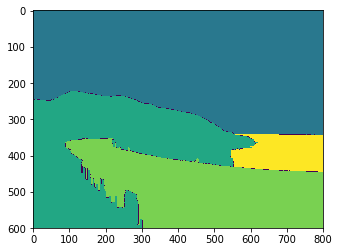

In [8]:
plt.imshow(markers_img_copy)

In [9]:
_,contours, hierarchy = cv2.findContours(markers_img_copy,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [10]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(road,contours,i,(255,0,0),5)

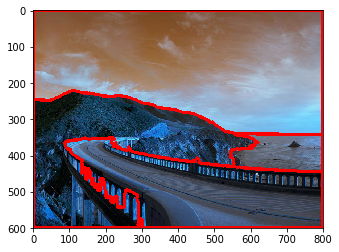

In [11]:
plt.imshow(road)